<a href="https://colab.research.google.com/github/brock-ricker/Online-Shoppers-Purchasing-Intent/blob/main/Online_Shoppers_Purchasing_Intent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online Shoppers Purchasing Intent
* Brock Ricker
* Last Update: 04/13/2022

In [57]:
#importing Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Loading and Cleaning Data

In [58]:
#loading data from github
filepath = "https://raw.githubusercontent.com/brock-ricker/Online-Shoppers-Purchasing-Intent/main/online_shoppers_intention.csv"
df = pd.read_csv(filepath)

In [59]:
#checking data info
df.info()
# no missing columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [60]:
#Converting boolean columns into objects for modeling/graphing
df["Weekend"] = df["Weekend"].replace({True:"Yes",False:"No"})
df["Revenue"] = df["Revenue"].replace({True:"Yes",False:"No"})
df = df.astype({"Weekend" : object, "Revenue":object })


In [61]:
#Looking for data inconsistencies - objects
df_obj = df.select_dtypes(include = "object")
df_obj_cols = list(df_obj)
for col in df_obj_cols:
  print(f"{col}: {df_obj[col].unique()}\n")
#Looks OK

Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']

Weekend: ['No' 'Yes']

Revenue: ['No' 'Yes']



In [62]:
#Looking for data inconsistencies - numerical
df.describe()
#The column values make sense according to the data dictionairy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#Exploratory Data Analysis

In [63]:
#Lets create functions to plot distribution of all the features 
sns.set_context('talk')

#only distribtuion
def dist_plot (df,col):
  plt.figure(figsize = (10,6))
  plot_hist = sns.histplot(data = df, x = col, hue = "Revenue", multiple = "stack")
  plot_hist.set_title(f'Distribution of {col} vs. Revenue',fontsize = 18, fontweight='bold' )
  plot_hist.set_xlabel(col, fontsize = 18)
  plot_hist.set_ylabel('Count', fontsize = 18)


#only box
def box_plot (dj,col):
  plt.figure(figsize = (6,10))
  plot_box = sns.boxplot(data = df[col])
  plot_box.set_title(f'Distribution of {col}',fontsize = 18, fontweight='bold' )
  plot_box.set_xlabel(col, fontsize = 18)

#distribution + box
def plot (df,col):
  plt.figure(figsize = (20,10))
  plt.subplot(1,2,1)
  plt.title(f'Distribution of {col} vs. Revenue')
  sns.histplot(data = df, x = col, hue = "Revenue", multiple = "stack")

  plt.subplot(1,2,2)
  plt.title(f'Distribution of {col}')
  sns.boxplot(data = df[col])
  
  plt.show()

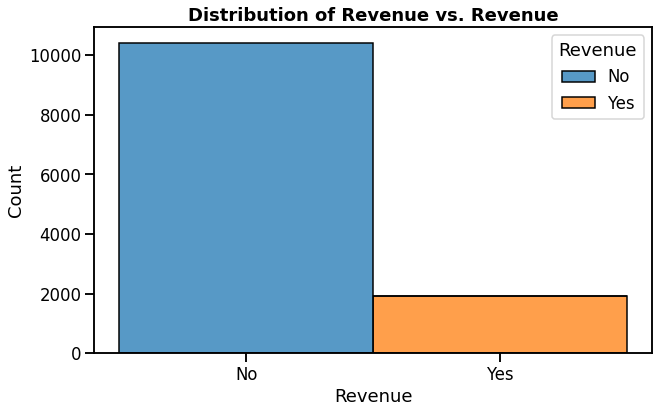

In [64]:
#Lets first plot the target column distribution
dist_plot(df,"Revenue")

This dataset is not well balanced, we will have to remember that when doing our modeling

In [65]:
#creating lists of feature columns to make plotting quickly easier
X = df.drop(columns="Revenue")
X_obj_cols = list(X.select_dtypes(include = "object"))
X_num_cols = list(X.select_dtypes(include = "number"))

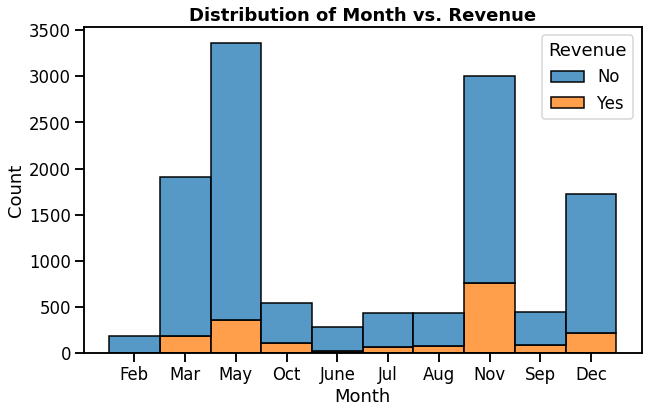

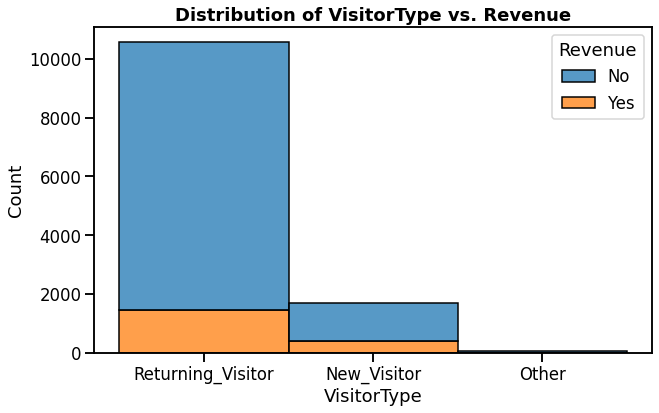

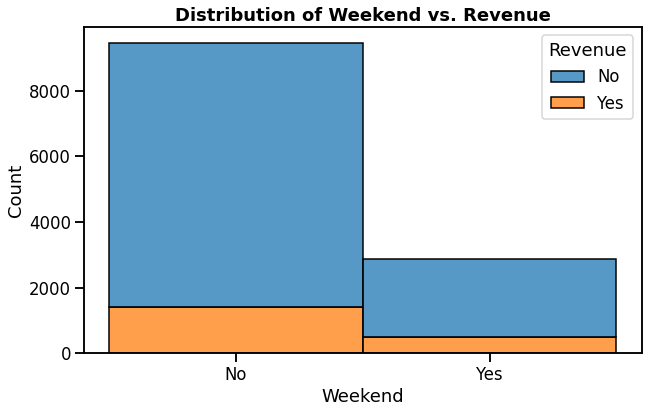

In [66]:
#plotting all object columns - box plot does not make sense in this case so I will do distribtuion only
for col in X_obj_cols:
  dist_plot(df,col)

There are no outliers in these columns. The distriburions are skewed toward certain values, but this makes sense in terms of:
* when people shop online (getting ready for summer, near christmas)
* people like to return to stores they like
* there are more weekdays than weekend days

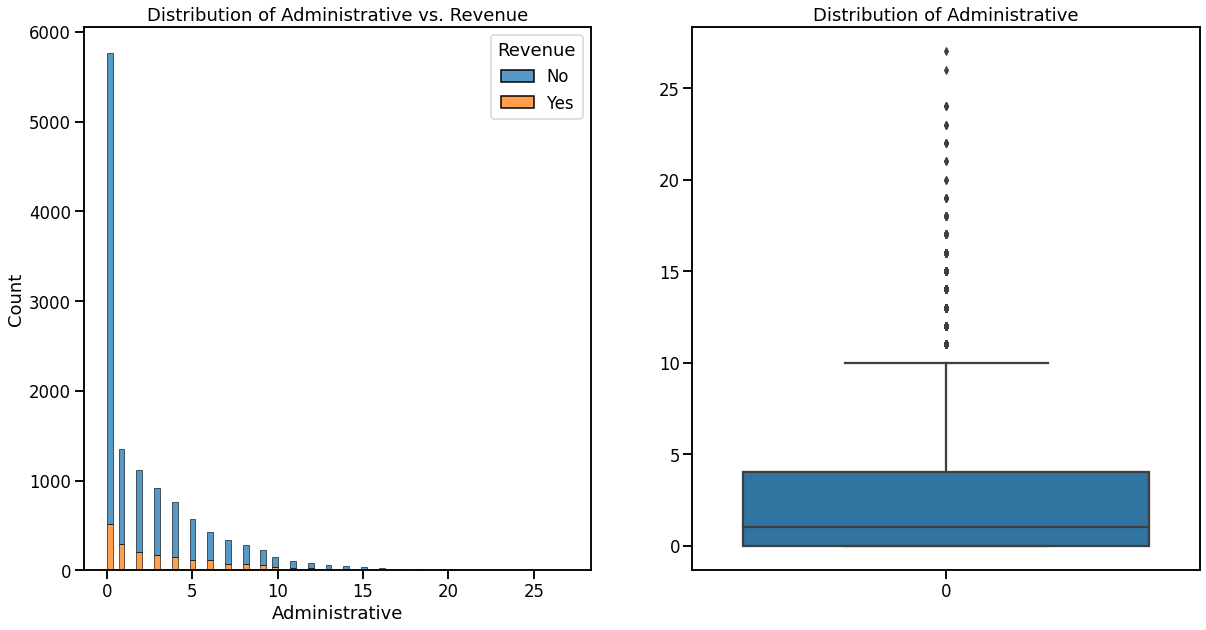

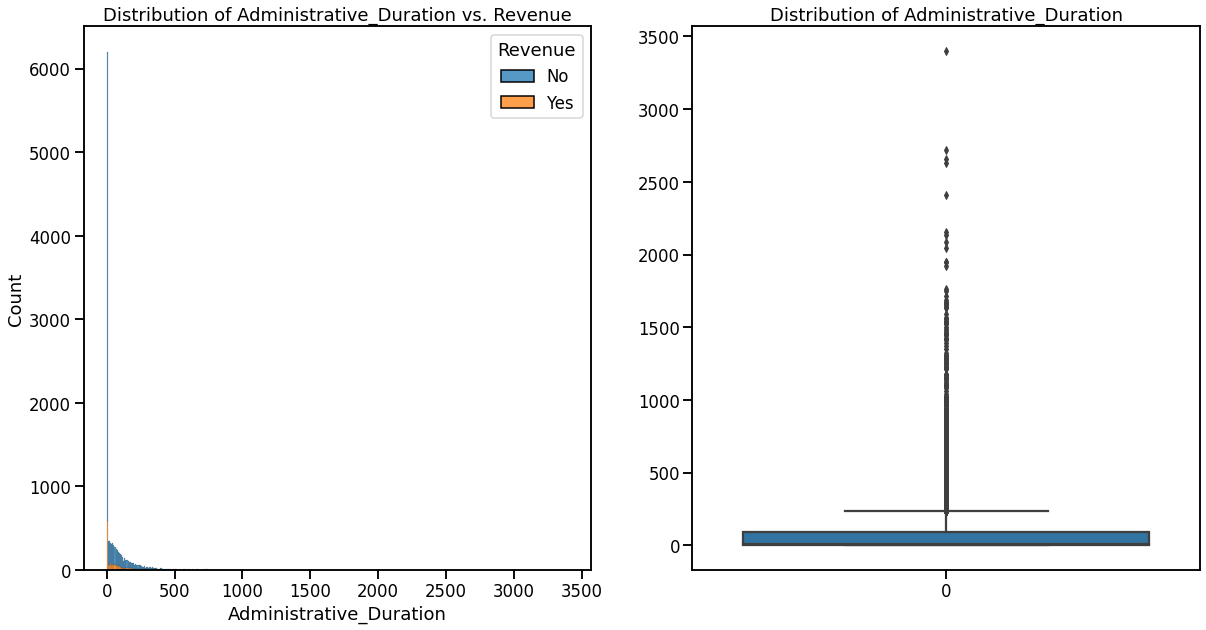

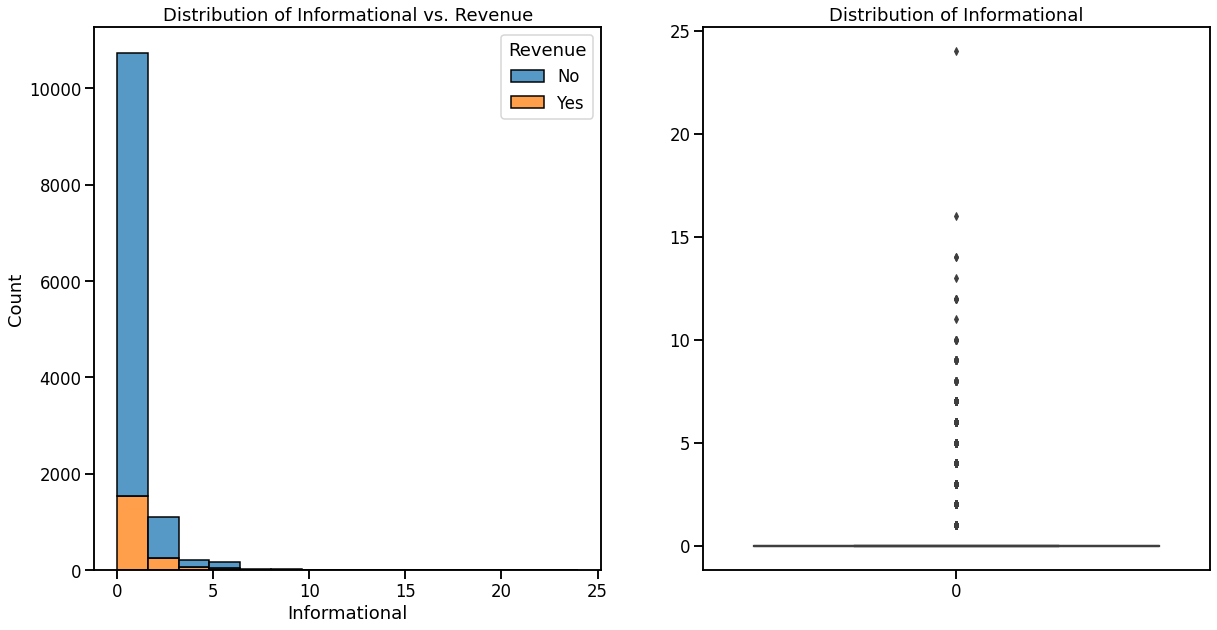

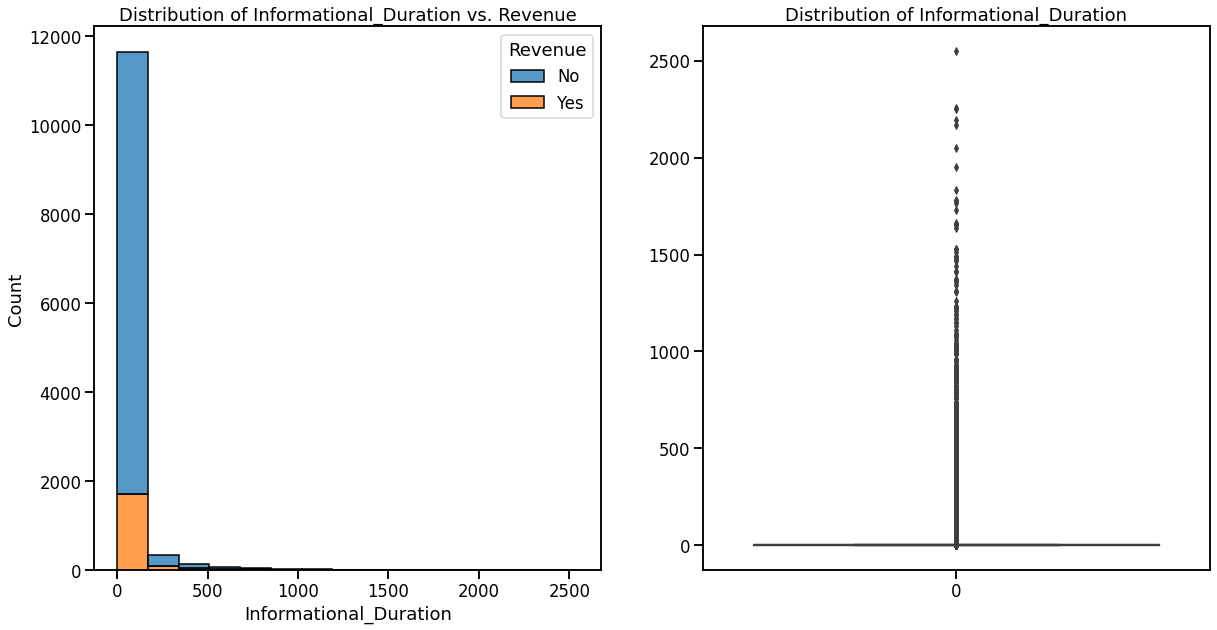

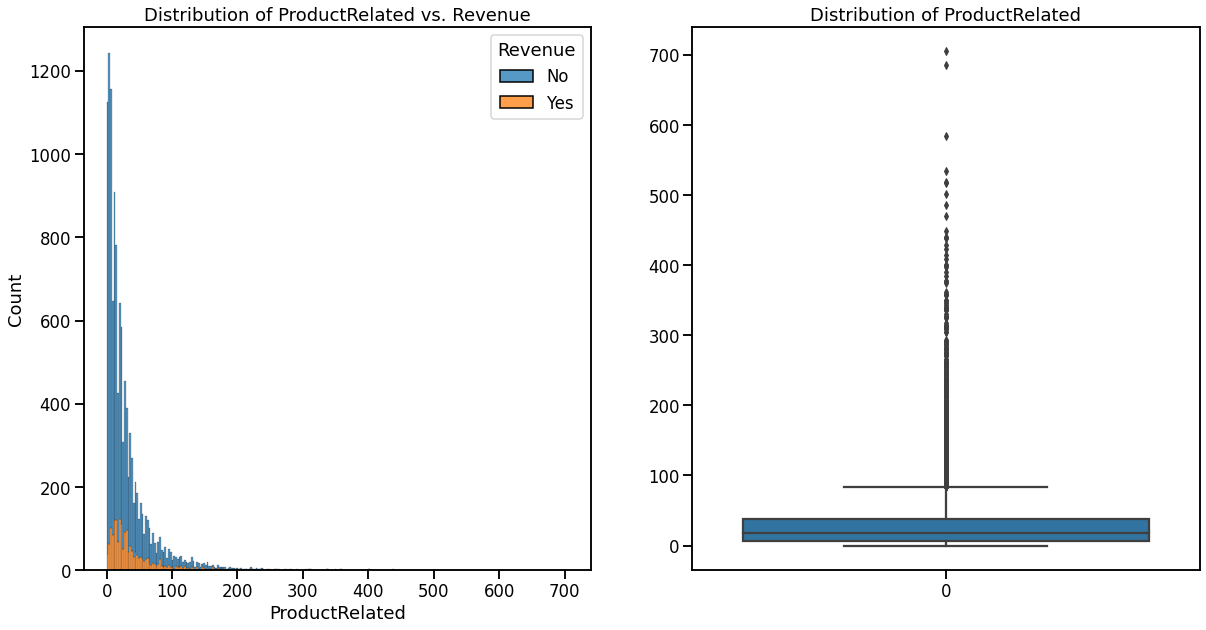

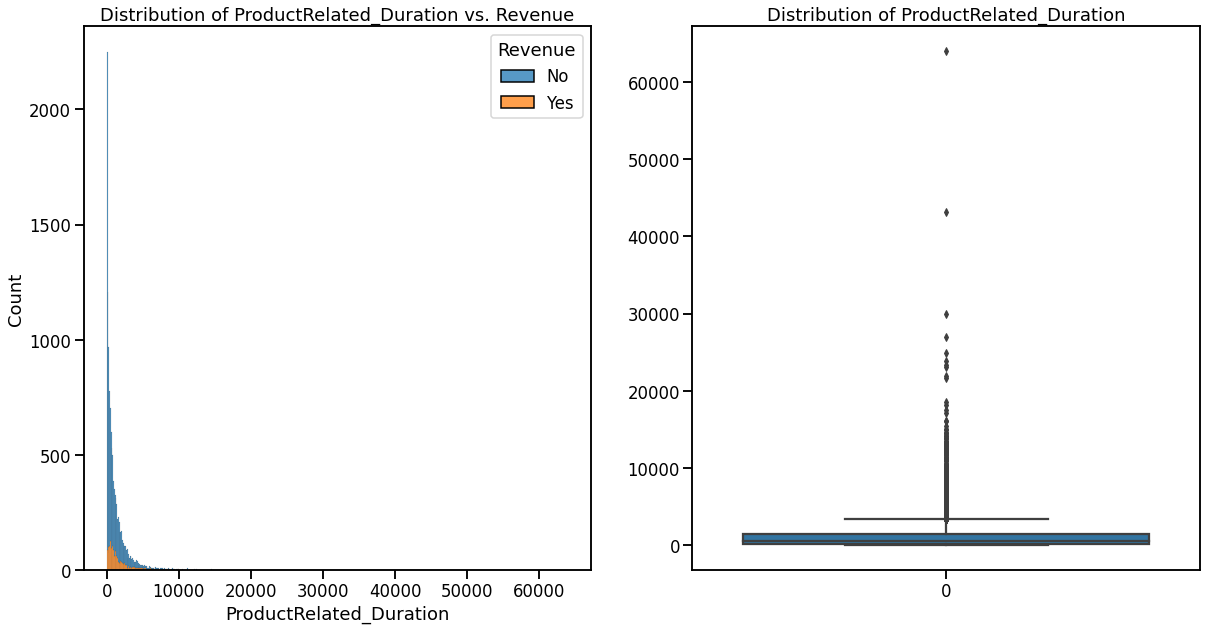

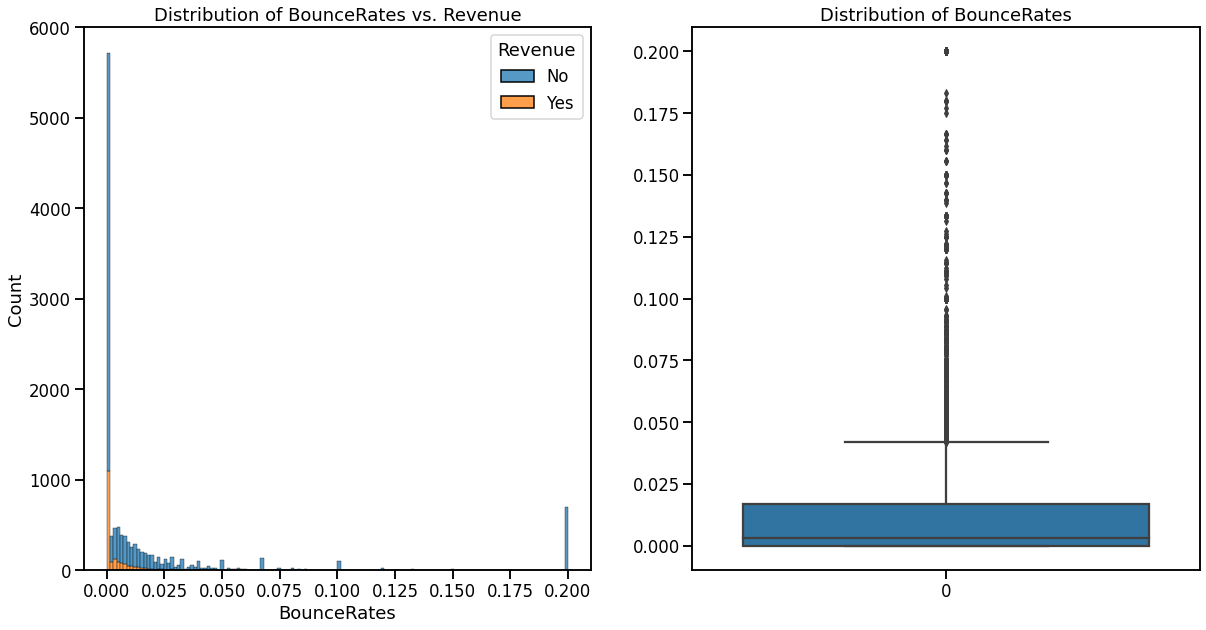

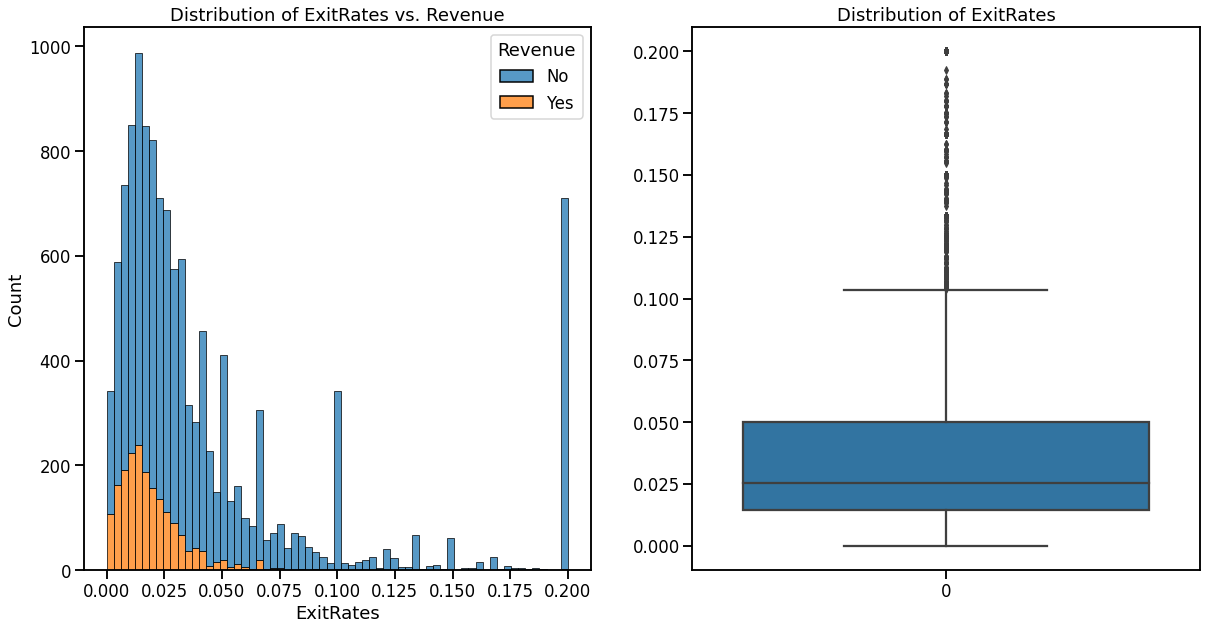

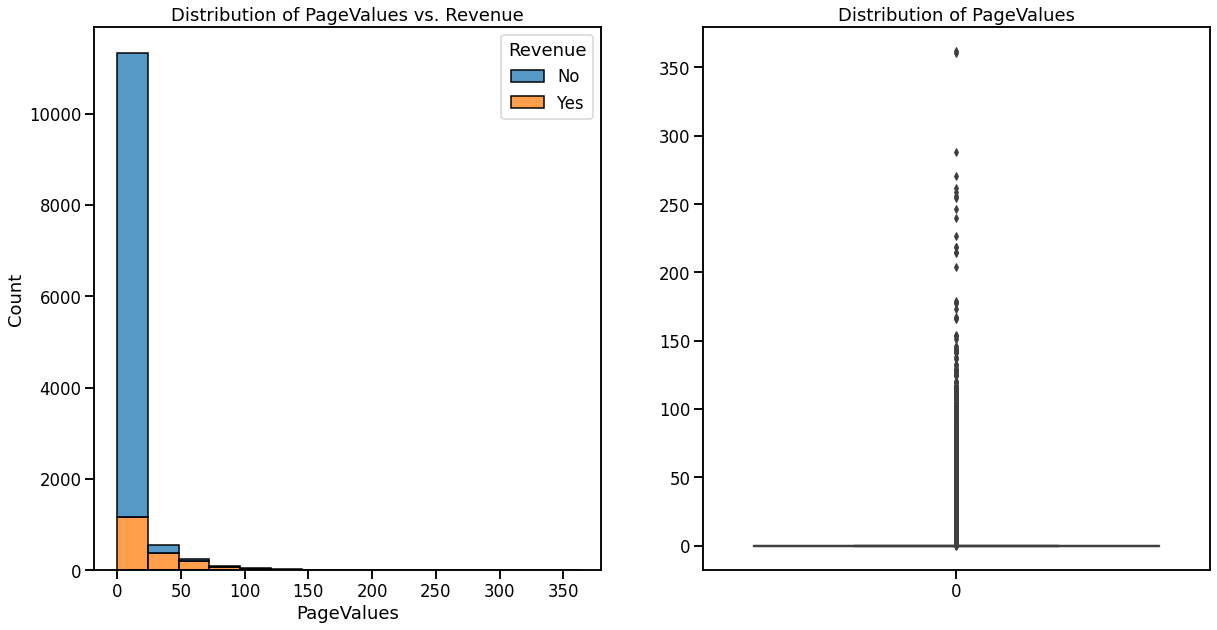

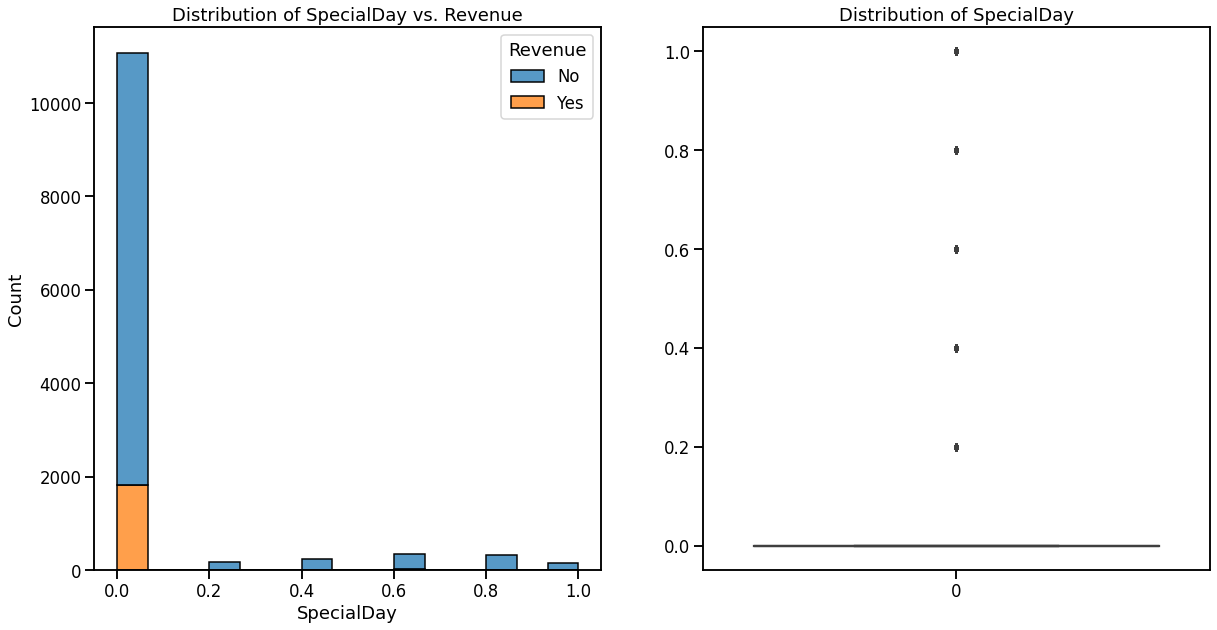

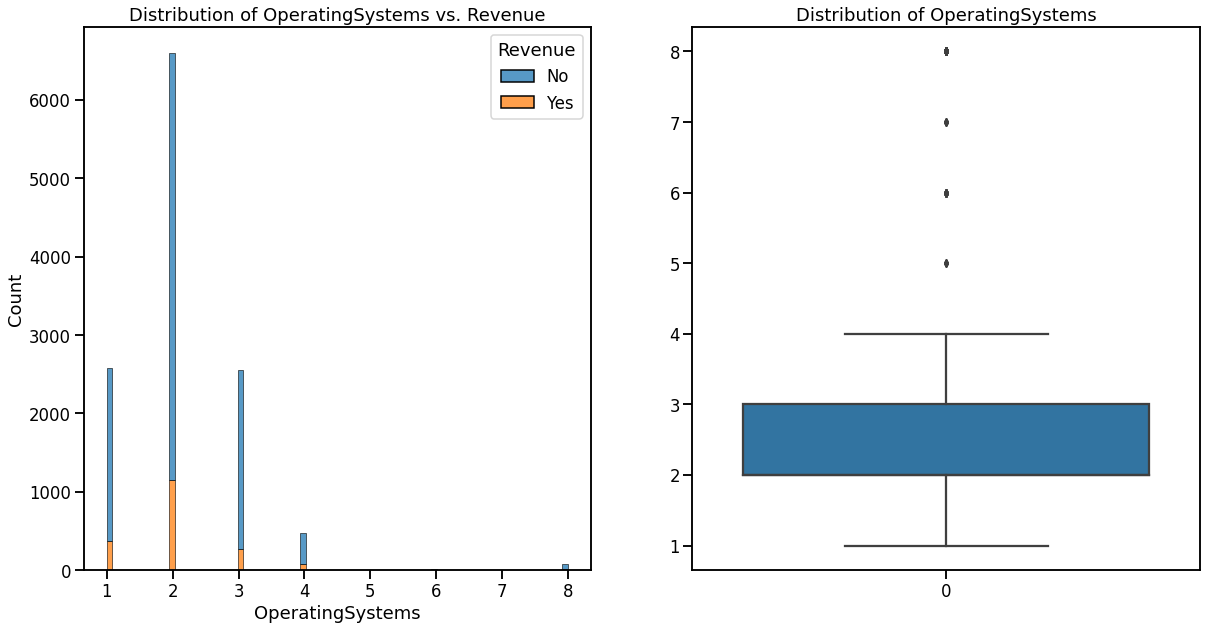

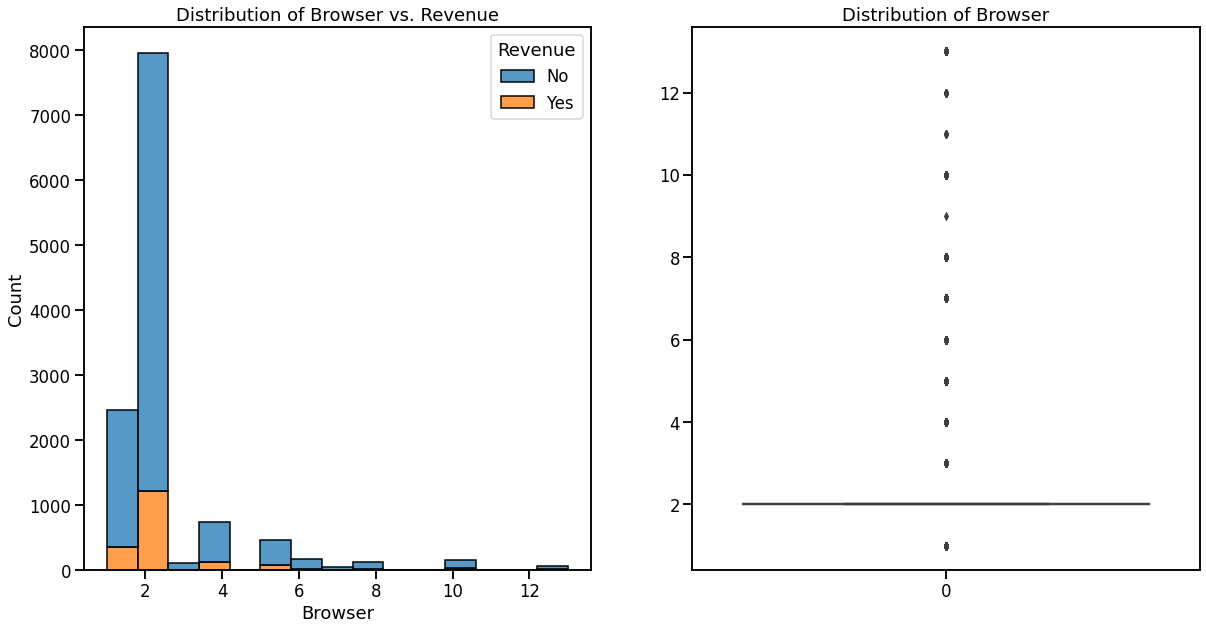

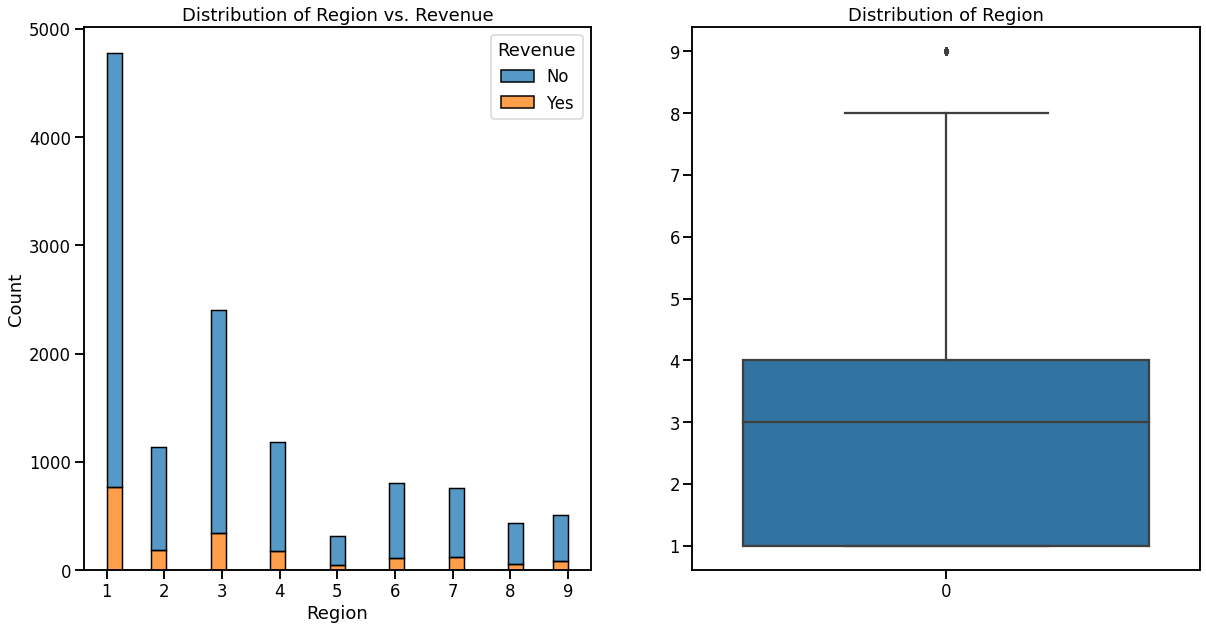

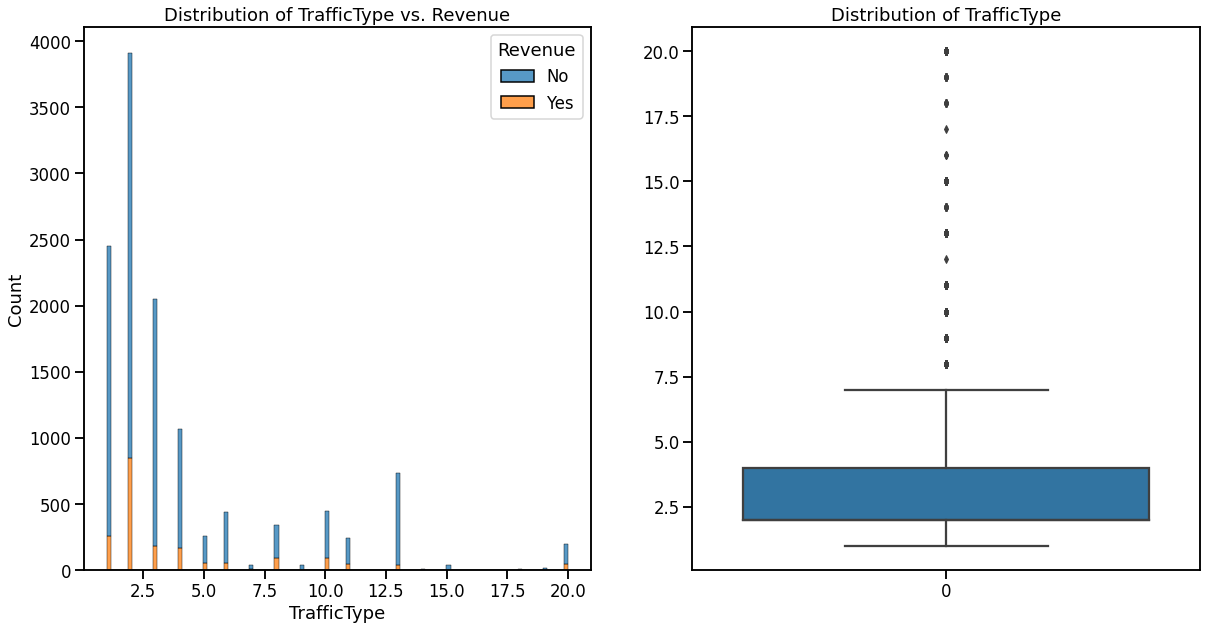

In [67]:
#plotting distribution of numerical columns
for col in X_num_cols:
  plot(df,col)

There are outliers in all columns, as shown by the boxplots. However, I do not think any of them are mistaken data entry, since the numeric summary I did earlier looks good. 

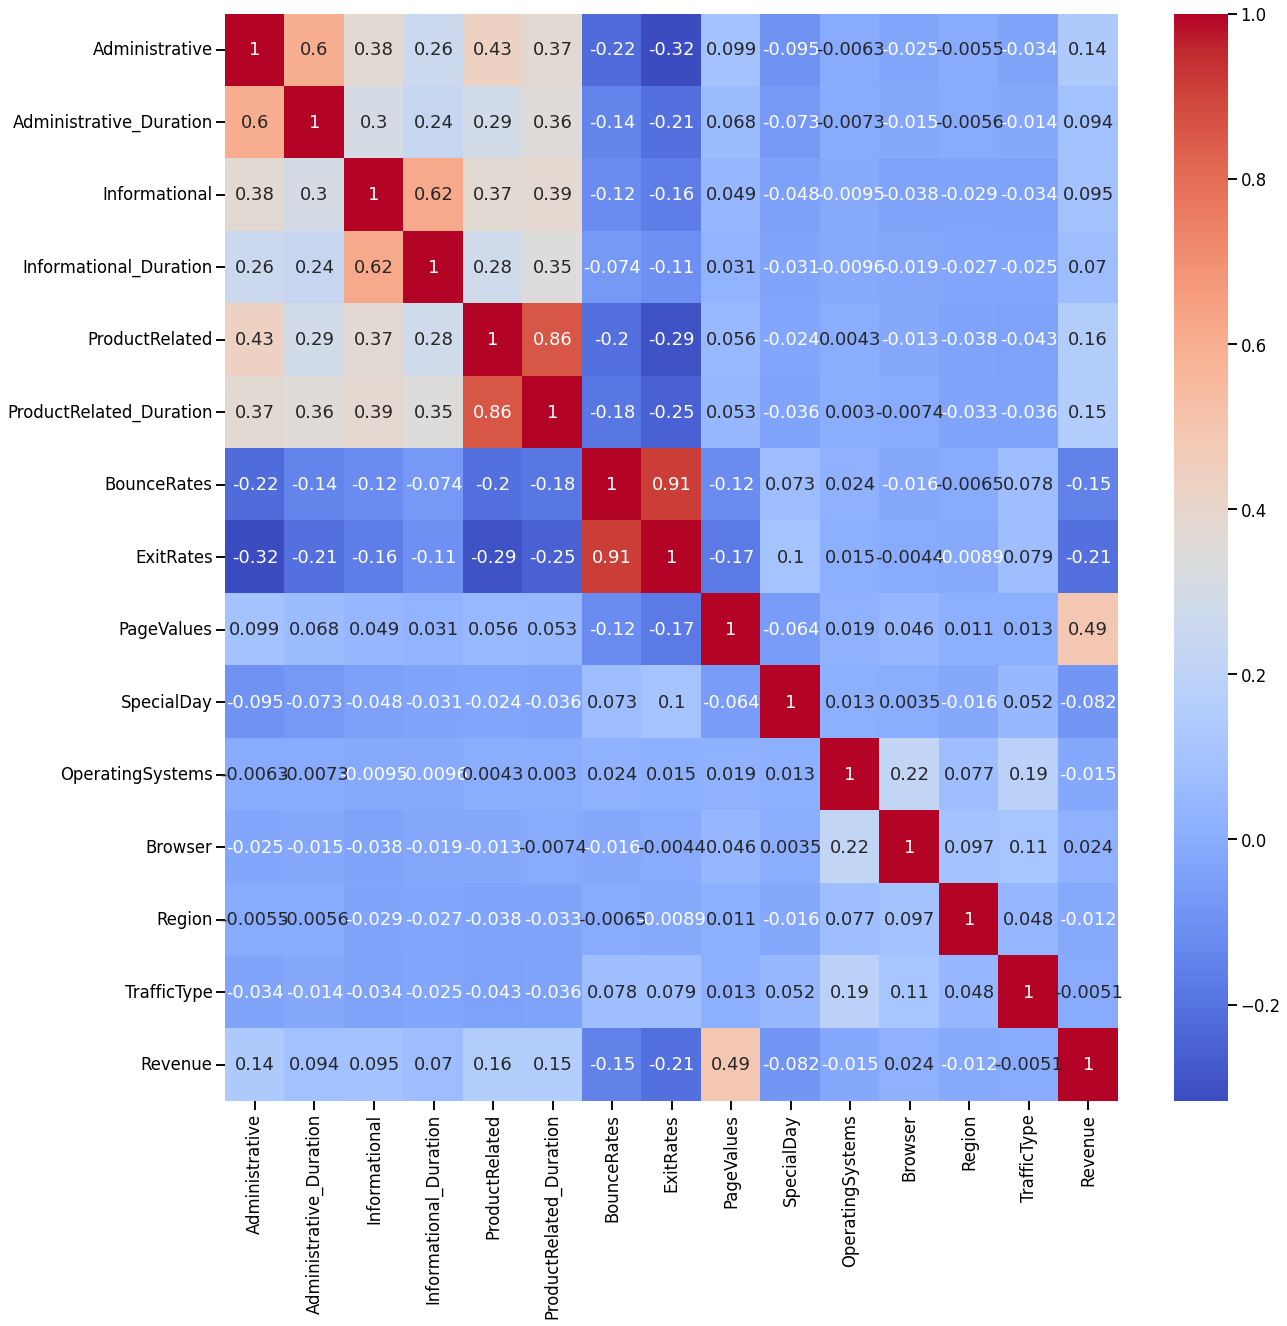

In [71]:
#Correlation Heatmap
#To get correlation with the target, I need to make the target column numeric

df_corr = df.copy()
df_corr["Revenue"] = df_corr["Revenue"].replace({"Yes":1,"No":0})
df_corr = df_corr.astype({"Revenue":int})
plt.figure(figsize = (20,20))
corr = df_corr.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = True);

The three columns with the highest correlation with Revenue are:
* Page Values (positive/moderate)
* Exit Rate (negative/weak)
* Bounce Rates (negative/weak)